# AFL 2 DATA MINING

# Data Cleaning and preparation:
1. Missing values
2. date_time format
3. categorical feature that needs to be encoded into numerical format


In [50]:
#pip install yellowbrick
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [51]:
#Import
url = 'customer_analysis.csv'
df = pd.read_csv(url, sep = "\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [52]:
#Missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [53]:
#Treatment
df = df.dropna()

In [54]:
#Result
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [55]:
#Check dupe
df.duplicated().sum()

0

In [56]:
#Date_time conversion format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [57]:
#Encode categorical into numerical
le = LabelEncoder()
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Education'] = le.fit_transform(df['Education'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [58]:
#Age extraction
df['Age'] = 2023-df['Year_Birth']

In [59]:
#Spending power
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [60]:
#Household living arrangement
df['Living_With'] = df['Marital_Status'].replace({'Single': 'Alone','Alone': 'Alone','Married': 'Spouse','Together': 'Spouse','Divorced': 'Alone','Widow': 'Alone','Absurd': 'Other','YOLO': 'Alone'})

In [61]:
#Family dynamics
df['Children'] = df['Kidhome'] + df['Teenhome']

In [62]:
#Family unity
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner': 2}) + df['Children']

In [63]:
#Parental status
df['Is_Parent'] = np.where(df.Children > 0,1,0)

In [64]:
#Edu evolution
df['Education'] = df['Education'].replace({'Basic':'Undergraduate','2nd Cycle':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [65]:
#Farewell to redundancy
df = df.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [66]:
#Not necessary feature
df = df.drop(["Marital_Status", "Kidhome", "Teenhome", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)
df.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,2,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,1,66,1617,4,0,4,0
1,2,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,69,27,4,2,6,1
2,2,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,58,776,5,0,5,0
3,2,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,39,53,5,1,6,1
4,4,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,42,422,3,1,4,1


In [67]:
df.describe()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.393953,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,...,0.064079,0.013538,0.009477,0.150271,54.179603,607.075361,3.726083,0.947202,4.673285,0.714350
std,1.124141,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,...,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,1.077731,0.749062,1.301407,0.451825
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,46.000000,69.000000,3.000000,0.000000,4.000000,0.000000
50%,2.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,53.000000,396.500000,4.000000,1.000000,5.000000,1.000000
75%,3.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,1048.000000,5.000000,1.000000,6.000000,1.000000
max,4.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,130.000000,2525.000000,7.000000,3.000000,8.000000,1.000000


In [68]:
#Checking Maximum Income Outlier 666666
df[df['Income'] == 666666]

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
2233,2,666666.0,23,9,14,18,8,1,12,4,...,0,0,0,0,46,62,5,1,6,1


In [69]:
#Checking Maximum Age Outlier 130 
df[df['Age'] == 130]

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
239,0,60182.0,23,8,0,5,7,0,2,1,...,0,0,0,0,130,22,4,1,5,1


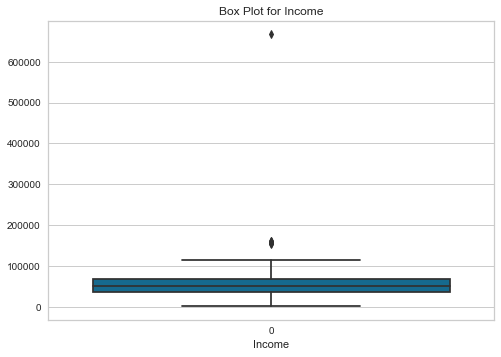

In [70]:
sns.boxplot(data=df['Income'])
plt.title('Box Plot for Income')
plt.xlabel('Income')
plt.show()

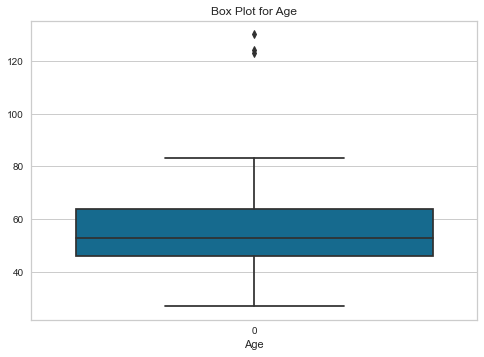

In [71]:
sns.boxplot(data=df['Age'])
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.show()

In [72]:
#Since the both feature value are too extreme and doesn't make sense, i'm doing treatment on the outliers by dropping the extreme values by setting a cap on 
#Age and Income columns
df = df[(df['Age'] < 90)]
df = df[(df['Income'] < 600000)]

# Data Preparation
1. Label Encoding: Translate categorical features into numbers so that your algorithms can work their magic.
2. Scaling: Using the standard scaler to put all features on the same playing field, making it easier for your algorithms to do their thing.
3. Dimensionality Reduction: Creating a smaller, more manageable subset of data, simplifying the complexity for smoother analysis. (may or may not be used)


In [73]:
#Scaling
scaler = StandardScaler()
scaledDt = scaler.fit_transform(df)
scaledDf = pd.DataFrame(scaledDt, columns=df.columns)
scaledDf

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.352543,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,...,-0.261914,-0.117256,-0.09552,2.375425,1.018352,1.676245,0.254760,-1.264598,-0.517224,-1.581139
1,-0.352543,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,...,-0.261914,-0.117256,-0.09552,-0.420977,1.274785,-0.963297,0.254760,1.404572,1.019511,0.632456
2,-0.352543,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,...,-0.261914,-0.117256,-0.09552,-0.420977,0.334530,0.280110,1.183144,-1.264598,0.251144,-1.581139
3,-0.352543,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,...,-0.261914,-0.117256,-0.09552,-0.420977,-1.289547,-0.920135,1.183144,0.069987,1.019511,0.632456
4,1.429916,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,...,-0.261914,-0.117256,-0.09552,-0.420977,-1.033114,-0.307562,-0.673624,0.069987,-0.517224,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.352543,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,...,-0.261914,-0.117256,-0.09552,-0.420977,0.163575,1.218061,-0.673624,0.069987,-0.517224,0.632456
2208,1.429916,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,...,3.818045,-0.117256,-0.09552,-0.420977,1.958607,-0.271040,1.183144,2.739158,2.556246,0.632456
2209,-0.352543,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,...,-0.261914,-0.117256,-0.09552,-0.420977,-1.033114,1.052052,-1.602008,-1.264598,-2.053959,-1.581139
2210,0.538686,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,...,-0.261914,-0.117256,-0.09552,-0.420977,1.103830,0.391336,1.183144,0.069987,1.019511,0.632456


In [74]:
#Dimensional reduction
pca = PCA(n_components=3)
pca.fit(scaledDf)
pca_df = pd.DataFrame(pca.fit_transform(scaledDf), columns=(['PC1','PC2','PC3']))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2212.0,2.303763e-16,2.835741,-5.357026,-2.478184,-0.904454,2.189906,8.514217
PC2,2212.0,9.084555e-17,1.518948,-4.154152,-1.086787,-0.108092,0.993724,5.741995
PC3,2212.0,-3.543479e-17,1.382654,-3.822884,-0.739495,-0.109601,0.458536,8.572269


# Clustering
key milestones:
1. Elbow Method: We'll pinpoint the ideal number of clusters.
2. Agglomerative Clustering: The heart of our clustering journey.
3. Scatter Plot Revelations: We'll unveil the cluster patterns using scatter plots. 


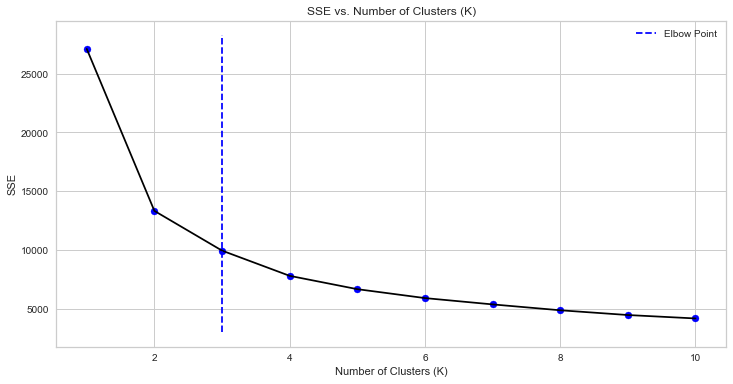

In [75]:
#Elbow method
kmeans_kwargs = {"init" : "k-means++","n_init" :10,"max_iter":300, "random_state":42}
sse=[]
# check the inertia for each K
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, **kmeans_kwargs)
    kmeans.fit(pca_df) 
    sse.append(kmeans.inertia_)
    
knee = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
plt.figure(figsize=(12, 6))
plt.plot(range(1,11), sse, color='black')
plt.scatter(range(1,11),sse,color='blue')
plt.title('SSE vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)

plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='--', colors='blue', label='Elbow Point')
plt.legend()
plt.show()

In [76]:
#using kneelocator to find the elbow/knee
kneed = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneed.elbow)

The best k for you model is 3


In [77]:
#Agglomerative clustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
label = model.fit_predict(pca_df)

In [78]:
df['Cluster'] = model.fit_predict(pca_df)
pca_df['Cluster'] = model.fit_predict(pca_df)
pca_df

,PC1,PC2,PC3,Cluster
0,4.432004,0.109315,-0.624178,1
1,-2.790597,0.317899,-0.302063,0
2,1.950662,-0.162681,-1.259774,2
3,-2.745964,-0.376024,-0.204646,0
4,-0.385654,0.306390,-0.552241,2
...,...,...,...,...
2207,2.288926,0.865238,-1.277659,2
2208,-1.388382,4.763052,0.493952,2
2209,2.392440,-1.417344,1.524566,1
2210,1.284921,1.700515,-1.368688,2


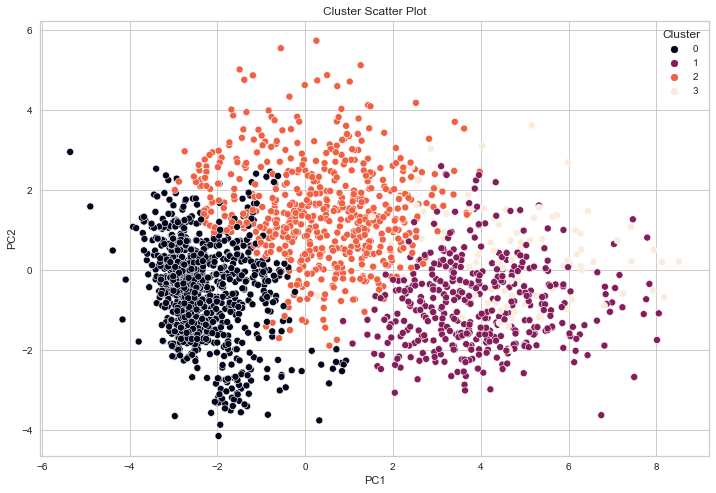

In [79]:
#Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, hue="Cluster", palette='rocket')
plt.title("Cluster Scatter Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster", loc="best")
plt.show()

# Visualization 
1. you may use scatterplots, swarmplot, boxenplot to evaluate your clustering models
2. draw distribution of cluster chart
3. profiling between income and spending cluster


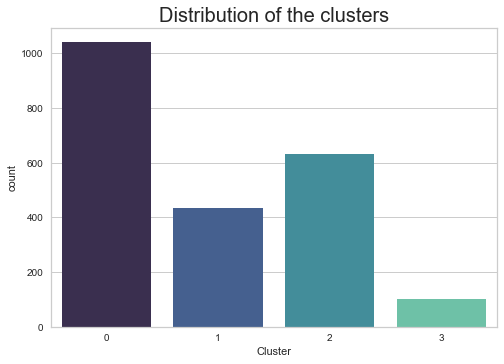

In [81]:
#Visualization of distribution of cluster chart
sns.countplot(x=df['Cluster'], palette='mako')
plt.title('Distribution of the clusters',fontsize=20)
plt.show()

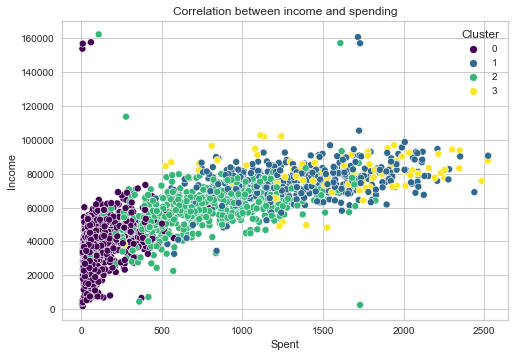

In [82]:
#Visualization using scatterplot
sns.scatterplot(data=df, x='Spent', y='Income', hue='Cluster', palette='viridis')
plt.xlabel('Spent')
plt.ylabel('Income')
plt.title('Correlation between income and spending')
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


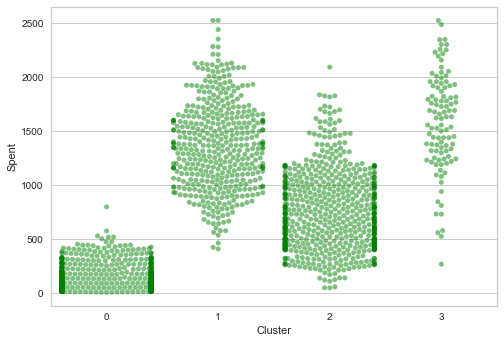

In [83]:
#Visualization using swarmplot
sns.swarmplot(x=df['Cluster'],y=df['Spent'], color= 'green',alpha=0.5)
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


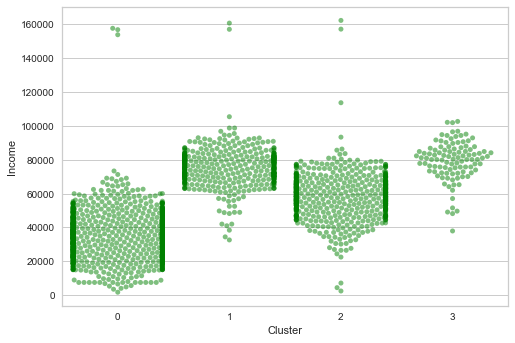

In [84]:
#Visualization using swarmplot
sns.swarmplot(x=df['Cluster'],y=df['Income'], color= 'green',alpha=0.5)
plt.show()

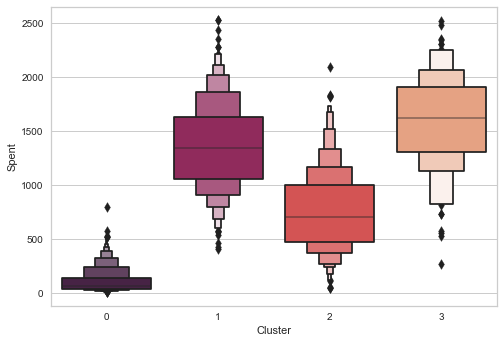

In [85]:
#Visualization using boxenplot
sns.boxenplot(x=df['Cluster'],y=df['Spent'], palette='rocket')
plt.show()

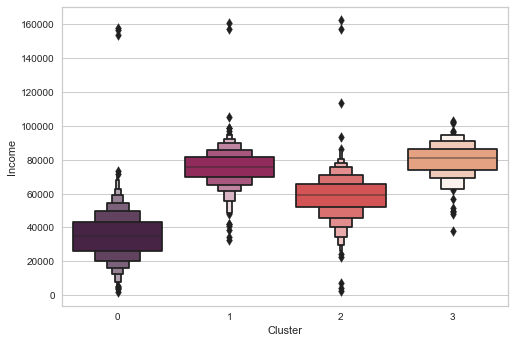

In [86]:
#Visualization using boxenplot
sns.boxenplot(x=df['Cluster'],y=df['Income'], palette='rocket')
plt.show()

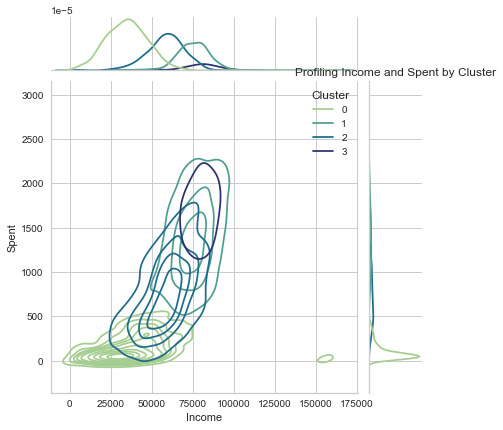

In [87]:
#Profiling using jointplot
sns.jointplot(x=df['Income'], y=df['Spent'], hue=df['Cluster'], kind='kde', palette='crest')
plt.title("Profiling Income and Spent by Cluster")
plt.show()

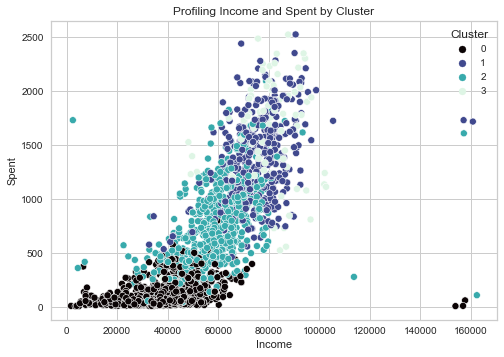

In [88]:
#Profiling using scatterplot
sns.scatterplot(data=df, x="Income", y="Spent", hue="Cluster", palette='mako')
plt.title("Profiling Income and Spent by Cluster")
plt.xlabel("Income")
plt.ylabel("Spent")
plt.grid(True)
plt.legend(title="Cluster", loc="best")
plt.show()